In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

%matplotlib qt5

In [2]:
import tensorflow as tf
from collections import namedtuple
#from tensorflow.python.summary import event_accumulator
from tensorflow.tensorboard.backend.event_processing import event_accumulator

RunStatistics = namedtuple('RunStatistics', ['eventaccumulator', 'scalars'])

def load_event_data(fn):
    ea = event_accumulator.EventAccumulator(fn)
    ea.Reload()
    
    def extract_scalar(event_accumulator, tag):
        data = [s.value for s in event_accumulator.Scalars(tag)]
        index = [s.step for s in event_accumulator.Scalars(tag)]
        return pd.Series(data, index)    
    scalars = dict([(t, extract_scalar(ea, t)) for t in ea.Tags()['scalars']])
    return RunStatistics(ea, scalars)

# MNIST BGIMG

In [3]:
files = glob.glob('/publicwork/tom/selfregularizing_nets/snn_paper/mnist_bgimg/*/events.out.tfevents.*')

# make descriptions shorter
description = [n.split('/')[-2] for n in files]
description = ["_".join(d.split('_')[:2]) for d in description]

alldata = [load_event_data(fn) for fn in files]
loss_va = pd.DataFrame([alldata[i].scalars['loss_va'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)
loss_tr = pd.DataFrame([alldata[i].scalars['loss_tr'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)

In [4]:
# extract only the relevant columns
data = loss_tr[['relubn_d08', 'relubn_d16', 'relubn_d32', 'selu_d08', 'selu_d16', 'selu_d32']] 

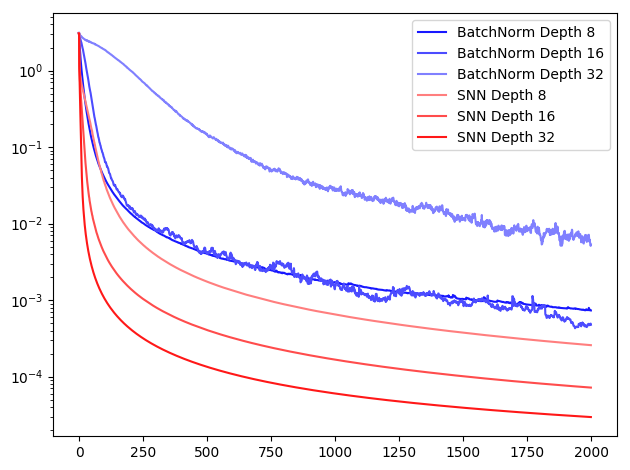

In [5]:
colors = plt.cm.bwr([0.05, 0.15, 0.25, 0.75, 0.85, 0.95])
labels = ['BatchNorm Depth 8', 'BatchNorm Depth 16', 'BatchNorm Depth 32', 'SNN Depth 8', 'SNN Depth 16', 'SNN Depth 32']

fig, ax = plt.subplots()
for i, r in enumerate(data):  # iterate over data columns
    d = data[r]
    ax.plot(d, color=colors[i], label=labels[i])
#loss_tr.plot(ax=ax, colormap=, logy=True)
ax.set_yscale('log')
ax_set_ylabel("Training Error")
ax.legend()
fig.tight_layout()
#fig.savefig('/system/user/unterthi/work/mnist_bgimg.png')
fig.savefig('/system/user/unterthi/work/mnist_bgimg.pdf')
fig

# MNIST

In [6]:
files = glob.glob('/publicwork/tom/selfregularizing_nets/snn_paper/mnist/*/events.out.tfevents.*')

# make descriptions shorter
description = [n.split('/')[-2] for n in files]
description = ["_".join(d.split('_')[:2]) for d in description]

alldata = [load_event_data(fn) for fn in files]
loss_va = pd.DataFrame([alldata[i].scalars['loss_va'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)
loss_tr = pd.DataFrame([alldata[i].scalars['loss_tr'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)

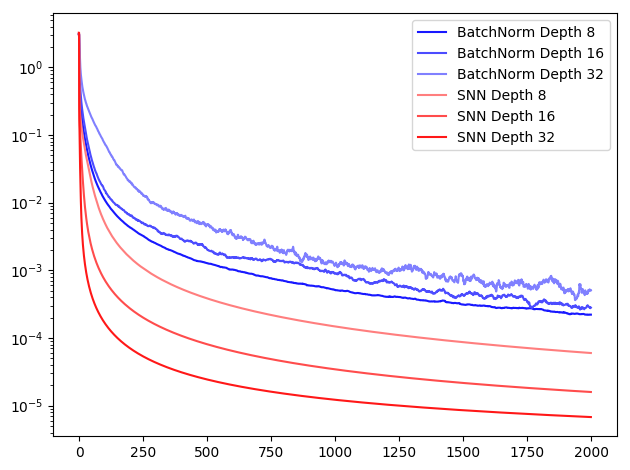

In [7]:
# extract only the relevant columns
data = loss_tr[['relubn_d08', 'relubn_d16', 'relubn_d32', 'selu_d08', 'selu_d16', 'selu_d32']] 

colors = plt.cm.bwr([0.05, 0.15, 0.25, 0.75, 0.85, 0.95])
labels = ['BatchNorm Depth 8', 'BatchNorm Depth 16', 'BatchNorm Depth 32', 'SNN Depth 8', 'SNN Depth 16', 'SNN Depth 32']

fig, ax = plt.subplots()
for i, r in enumerate(data):  # iterate over data columns
    d = data[r]
    ax.plot(d, color=colors[i], label=labels[i])
#loss_tr.plot(ax=ax, colormap=, logy=True)
ax.set_yscale('log')
ax.legend()
fig.tight_layout()
#fig.savefig('/system/user/unterthi/work/mnist.png')
fig.savefig('/system/user/unterthi/work/mnist.pdf')
fig

# CIFAR 10

In [8]:
files = glob.glob('/publicwork/tom/selfregularizing_nets/snn_paper/cifar10/*/events.out.tfevents.*')

# make descriptions shorter
description = [n.split('/')[-2] for n in files]
description = ["_".join(d.split('_')[:2]) for d in description]

alldata = [load_event_data(fn) for fn in files]
loss_va = pd.DataFrame([alldata[i].scalars['loss_va'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)
loss_tr = pd.DataFrame([alldata[i].scalars['loss_tr'] for i in range(len(alldata))], index=description).T.sort_index(axis=1)

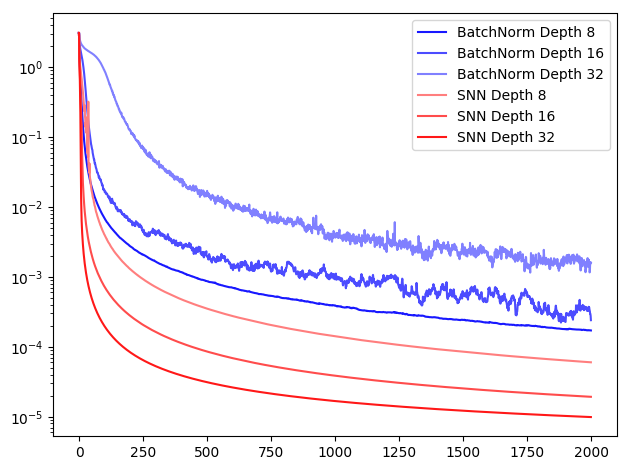

In [9]:
# extract only the relevant columns
data = loss_tr[['relubn_d08', 'relubn_d16', 'relubn_d32', 'selu_d08', 'selu_d16', 'selu_d32']] 

colors = plt.cm.bwr([0.05, 0.15, 0.25, 0.75, 0.85, 0.95])
labels = ['BatchNorm Depth 8', 'BatchNorm Depth 16', 'BatchNorm Depth 32', 'SNN Depth 8', 'SNN Depth 16', 'SNN Depth 32']

fig, ax = plt.subplots()
for i, r in enumerate(data):  # iterate over data columns
    d = data[r]
    ax.plot(d, color=colors[i], label=labels[i])
#loss_tr.plot(ax=ax, colormap=, logy=True)
ax.set_yscale('log')
ax.legend()
fig.tight_layout()
#fig.savefig('/system/user/unterthi/work/cifar10.png')
fig.savefig('/system/user/unterthi/work/cifar10.pdf')
fig

# System Information

In [10]:
import biutils
biutils.print_system_information()

Host:                cobra: Linux-3.10.0-327.36.1.el7.x86_64-x86_64-with-centos-7.2.1511-Core
Date:                2017-05-10 10:37:50.784749
Python version:      3.6.1 (default, Mar 28 2017, 18:54:00) 
                     [GCC 4.8.5 20150623 (Red Hat 4.8.5-11)]
repository version:  commit 56a15e81e7e58c613602190bb17b9ce9b773d7e8

loaded modules:
	 biutils 2017.2
	 matplotlib 2.0.0
	 numpy 1.12.1
	 pandas 0.19.2
	 tensorflow 1.1.0
